<a href="https://colab.research.google.com/github/janeaf/Hongos/blob/main/Hongos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

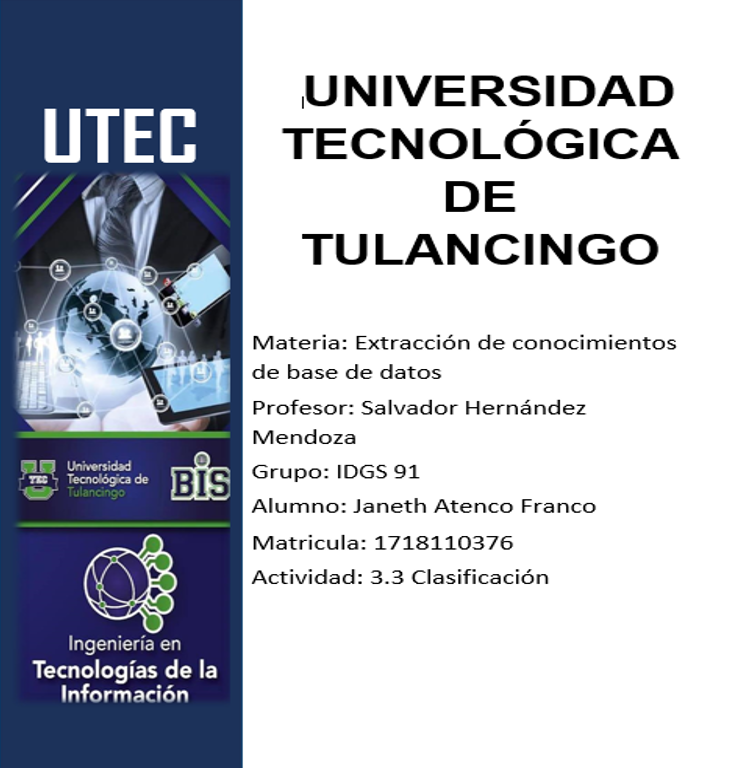

## **Repositorio en GitHub de nombre Hongos.**

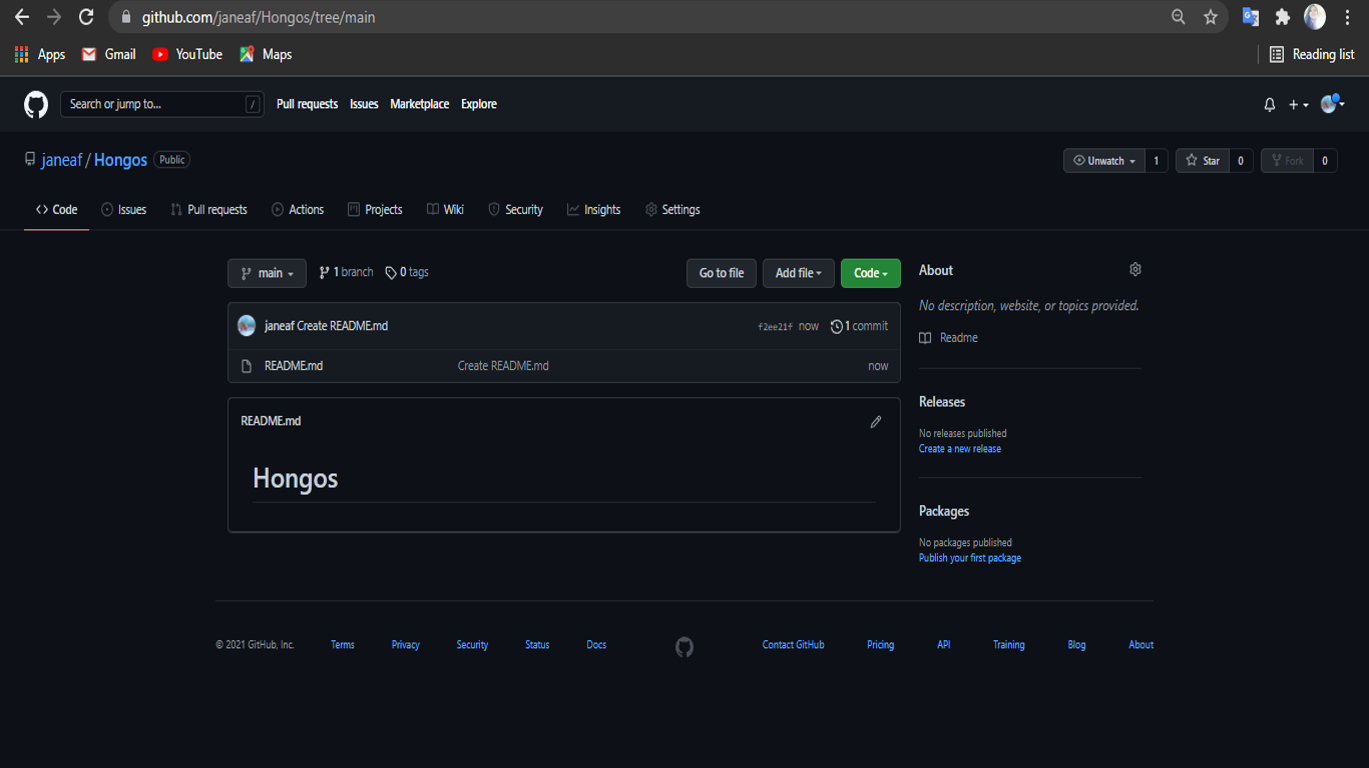

# **Realizar el análisis**

# **Importación de librerias**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# **Recuperación de los datos**

In [ ]:
dataframe = pd.read_csv("mushrooms.csv")

In [ ]:
dataframe.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


In [ ]:
dataframe.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


# **Información del Dataset**

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# **Clase Hongos**

In [ ]:
dataframe['class'].unique()

array(['p', 'e'], dtype=object)

Ejemplo 1

In [ ]:
dataframe['cap-surface'].unique()

array(['s', 'y', 'f', 'g'], dtype=object)

Ejemplo 2

In [ ]:
dataframe['cap-color'].unique()

array(['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], dtype=object)

# **Convertir**
## Columnas en Categorias

In [ ]:
columns = dataframe.columns
dataframe[columns] = dataframe[columns].astype('category')

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

## **Pre-procesar Categorias**

In [ ]:
encoder = OrdinalEncoder()
encoder.fit(dataframe[columns])
dataframe[columns] = encoder.transform(dataframe[columns])

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   class                     8124 non-null   float64
 1   cap-shape                 8124 non-null   float64
 2   cap-surface               8124 non-null   float64
 3   cap-color                 8124 non-null   float64
 4   bruises                   8124 non-null   float64
 5   odor                      8124 non-null   float64
 6   gill-attachment           8124 non-null   float64
 7   gill-spacing              8124 non-null   float64
 8   gill-size                 8124 non-null   float64
 9   gill-color                8124 non-null   float64
 10  stalk-shape               8124 non-null   float64
 11  stalk-root                8124 non-null   float64
 12  stalk-surface-above-ring  8124 non-null   float64
 13  stalk-surface-below-ring  8124 non-null   float64
 14  stalk-co

In [ ]:
dataframe.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,3.0,2.0,2.0,7.0,7.0,0.0,2.0,1.0,4.0,2.0,3.0,5.0
1,0.0,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,2.0,2.0,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,2.0,2.0,2.0,7.0,7.0,0.0,2.0,1.0,4.0,3.0,2.0,3.0


In [ ]:
dataframe['gill-attachment'].unique()

array([1., 0.])

# **Descripción del Dataset**

In [ ]:
dataframe.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


# **Obtención de clases**

In [ ]:
z = dataframe['class']
z

0       1.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
8119    0.0
8120    0.0
8121    0.0
8122    1.0
8123    0.0
Name: class, Length: 8124, dtype: float64

## **Correlación**

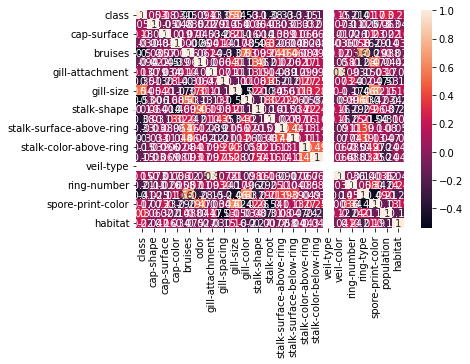

In [ ]:

sns.heatmap(dataframe.corr(),  annot=True) 

## **Revición de correlación con z**

In [ ]:
corr = dataframe.corr()

corr['class'].sort_values(ascending=False)


class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

# **Modelo de Clasificación**

In [ ]:
model = KNeighborsClassifier(n_neighbors=7)

# **Train y Test**

In [ ]:
x = dataframe[['gill-size', 'population', 'habitat', 'cap-surface', 'spore-print-color', 'veil-color', 'cap-shape' ]]
y = dataframe['class']

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=1234)

In [ ]:
print(x_train.count())


gill-size            6499
population           6499
habitat              6499
cap-surface          6499
spore-print-color    6499
veil-color           6499
cap-shape            6499
dtype: int64


In [ ]:
print(x_test.count())

gill-size            1625
population           1625
habitat              1625
cap-surface          1625
spore-print-color    1625
veil-color           1625
cap-shape            1625
dtype: int64


# **Entrenar el Modelo**

In [ ]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

Predición 

In [ ]:
apdz = model.predict(x_test)

Evaluación modelo

In [ ]:
print(classification_report(y_test, apdz))
print(accuracy_score(y_test, apdz))
print(confusion_matrix(y_test, apdz))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       817
         1.0       0.98      0.99      0.98       808

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

0.9827692307692307
[[799  18]
 [ 10 798]]


### **Matriz**

In [ ]:
confusion_matrix(y_test, apdz)

array([[799,  18],
       [ 10, 798]])

**Conclusión**

Se implementa todo lo aprendido con anterioridad para poder realizar la actividad y los conocimientos para obtener un analisis de manera real.